# Image Classification App / Dashboard | Streamlit

## <span style="color:tomato;">Table of Contents</span>

1. **Load Model**
2. **Make Prediction**
3. **Interpret Predictions**

## <span style="color:tomato;">Python Dependencies</span>

* **streamlit**
* **pytorch**
* **torchvision**
* **captum**
* **matplotlib**
* **numpy**

In [1]:
import torch

print("PyTorch Version : {}".format(torch.__version__))

import torchvision

print("TorchVision Version : {}".format(torchvision.__version__))

import captum

print("Captum Version : {}".format(captum.__version__))

import matplotlib

print("Matplotlib Verion : {}".format(matplotlib.__version__))

import numpy as np

print("Numpy Version : {}".format(np.__version__))

PyTorch Version : 2.0.0+cu117
TorchVision Version : 0.15.1+cu117
Captum Version : 0.6.0
Matplotlib Verion : 3.6.0
Numpy Version : 1.24.2


## 1. Load Model

In [2]:
from torchvision.models import resnet50, ResNet50_Weights

model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

model.eval();

In [4]:
preprocess_func = ResNet50_Weights.IMAGENET1K_V2.transforms()

preprocess_func

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [5]:
categories = np.array(ResNet50_Weights.IMAGENET1K_V2.meta["categories"])

len(categories), categories[:5]

(1000,
 array(['tench', 'goldfish', 'great white shark', 'tiger shark',
        'hammerhead'], dtype='<U30'))

## 2. Make Prediction

### 2.1 Load Image

In [6]:
from PIL import Image

shark = Image.open("shark.jpg")

shark.size

(640, 475)

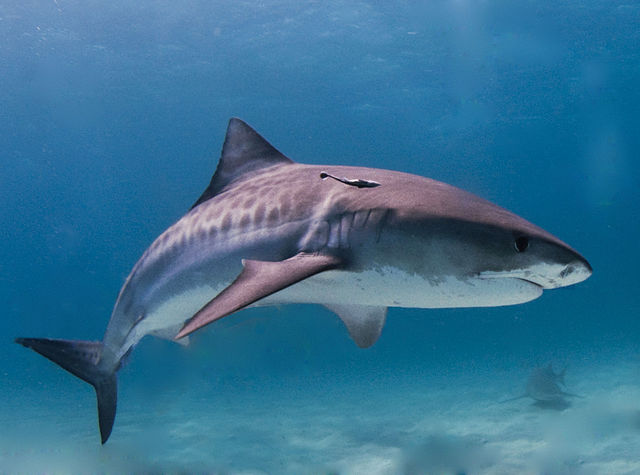

In [7]:
shark

### 2.2 Preprocess Image

In [8]:
processed_img = preprocess_func(shark)

processed_img.shape

torch.Size([3, 224, 224])

### 2.3 Predict

In [9]:
probs = model(processed_img.unsqueeze(0))

probs = probs.softmax(1)

probs = probs[0].detach().numpy()

### 2.4 Sort Probs

In [10]:
prob = probs[probs.argsort()[-5:][::-1]]
idxs = probs.argsort()[-5:][::-1]

prob, idxs

(array([0.53391576, 0.00302059, 0.00298607, 0.00283408, 0.00244832],
       dtype=float32),
 array([  3,   2,   4,  13, 814]))

In [11]:
categories[idxs]

array(['tiger shark', 'great white shark', 'hammerhead', 'junco',
       'speedboat'], dtype='<U30')

## 3. Interpret Predictions

In [12]:
from captum.attr import IntegratedGradients

interpretation_algo = IntegratedGradients(model)

In [13]:
feature_imp = interpretation_algo.attribute(processed_img.unsqueeze(0), target=3)

feature_imp.shape

torch.Size([1, 3, 224, 224])

In [15]:
feature_imp = feature_imp[0].numpy()

feature_imp = feature_imp.transpose(1,2,0)

feature_imp.shape

(224, 224, 3)

In [16]:
processed_img_np = processed_img.numpy().transpose(1,2,0)

processed_img_np.shape

(224, 224, 3)

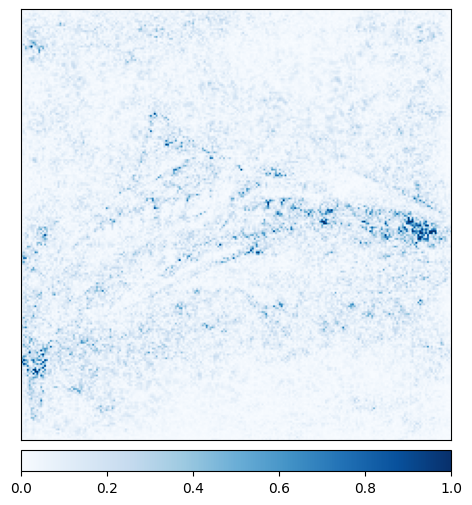

In [29]:
from captum.attr import visualization as viz

fig, ax = viz.visualize_image_attr(feature_imp, show_colorbar=True, fig_size=(6,6));

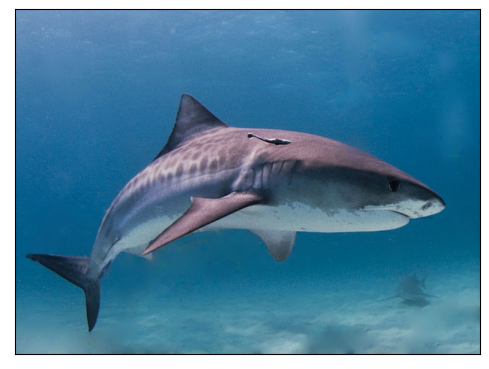

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)

plt.imshow(shark);
plt.xticks([],[]);
plt.yticks([],[]);

## References

* **[Captum](https://coderzcolumn.com/tutorials/artificial-intelligence/captum-for-pytorch-image-classification-networks)**
* **[Image Classification using PyTorch](https://coderzcolumn.com/tutorials/artificial-intelligence/pytorch-image-classification-using-pre-trained-models)**